In [1]:
##  preserntation for a confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [3]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import time
from datetime import datetime

start_time = datetime.now()

batch_size = 100
num_classes = 10
epochs = 6

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
#model.add(ZeroPadding2D(padding=(2, 2))) # Padding of 2
model.add(Conv2D(16, kernel_size=(5, 5),
                 strides=(1, 1),
                 activation='relu',
                 padding="same",
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
#model.add(ZeroPadding2D(padding=(2, 2))) # Padding of 2
model.add(Conv2D(32, kernel_size=(5, 5), 
                 strides=(1, 1),
                 activation='relu', 
                 padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Flatten())
#model.add(Dense(num_classes))
#model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax')) # Should I have softmax here?

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy']) # updated to Adam and learning rate

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# # Convolutional neural network (two convolutional layers)
# class ConvNet(nn.Module):
#     def __init__(self, num_classes=10):
#         super(ConvNet, self).__init__()
#         self.layer1 = nn.Sequential(
#             nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
#             nn.BatchNorm2d(16),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#             )
#         self.layer2 = nn.Sequential(
#             nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2))
#         self.fc = nn.Linear(7*7*32, num_classes)
        
#     def forward(self, x):
#         out = self.layer1(x)
#         out = self.layer2(out)
#         out = out.reshape(out.size(0), -1)
#         out = self.fc(out)
#         return out

# model = ConvNet(num_classes).to(device)

print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/6
600/600 [==============================] - 82s 137ms/step - loss: 0.4631 - accuracy: 0.8633 - val_loss: 0.2018 - val_accuracy: 0.9524
Epoch 2/6
600/600 [==============================] - 82s 137ms/step - loss: 0.1200 - accuracy: 0.9656 - val_loss: 0.0912 - val_accuracy: 0.9723
Epoch 3/6
600/600 [==============================] - 82s 136ms/step - loss: 0.0810 - accuracy: 0.9762 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 4/6
600/600 [==============================] - 82s 137ms/step - loss: 0.0617 - accuracy: 0.9821 - val_loss: 0.0592 - val_accuracy: 0.9807
Epoch 5/6
600/600 [==============================] - 82s 137ms/step - loss: 0.0499 - accuracy: 0.9855 - val_loss: 0.0517 - val_accuracy: 0.9831
Epoch 6/6
600/600 [==============================] - 87s 146ms/step - loss: 0.0409 - accuracy: 0.9883 - val_loss: 0.0451 - val_accuracy: 0.9858
Test loss: 0.0451040081679821
Test accuracy: 0.98580002784729
T

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


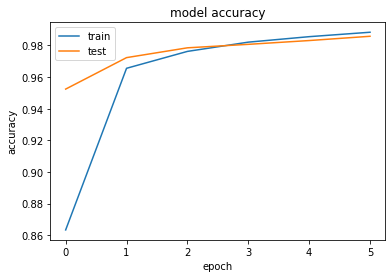

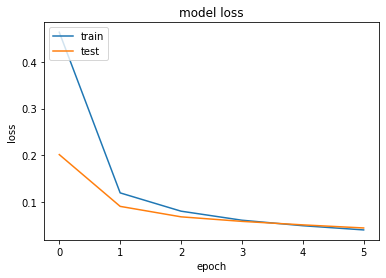

In [4]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [5]:
predictions = model.predict(x_test, verbose=0)



In [6]:


yitest = np.argmax(y_test, axis=1)

yptest = np.argmax(predictions, axis=1)
print (yitest)
print (yptest)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [7]:
## For analysis show also the confusion matrix



cfm = confusion_matrix(yitest, yptest)
print (cfm)

[[ 973    0    2    0    0    0    3    1    0    1]
 [   0 1131    1    1    0    0    1    0    1    0]
 [   0    6 1014    6    1    0    1    1    3    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    0    0  972    0    0    0    3    7]
 [   1    0    0    6    0  882    2    0    1    0]
 [   2    2    0    1    1    2  948    0    2    0]
 [   1    5   10    2    0    1    0 1005    1    3]
 [   3    1    2    5    2    4    1    2  949    5]
 [   3    4    1    5    7    5    0    3    3  978]]


Confusion matrix, without normalization


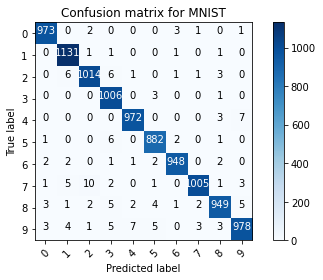

In [8]:
plot_confusion_matrix(cfm, classes=range(10), 
                      title='Confusion matrix for MNIST')

